In [1]:
#-- DEFINITIONS --
import numpy as np
from astropy.cosmology import Planck18 as cosmo
h0 = cosmo.H(0).value/100
from colossus.cosmology import cosmology
from colossus.lss import mass_function
cosmology.setCosmology('planck18')

from gw_lensing.utils.constants import *
from gw_lensing.lens_models import sis

#PLOTTING MODULES
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSZ = 17
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

import sys
dir_base=sys.path[0]
dir_out=dir_base+"/plots_optical_depth/"

# Singular Isothermal Sphere

In the SIS model there are always two images whenever $\beta<\theta_0$. Their magnifications are known analytically

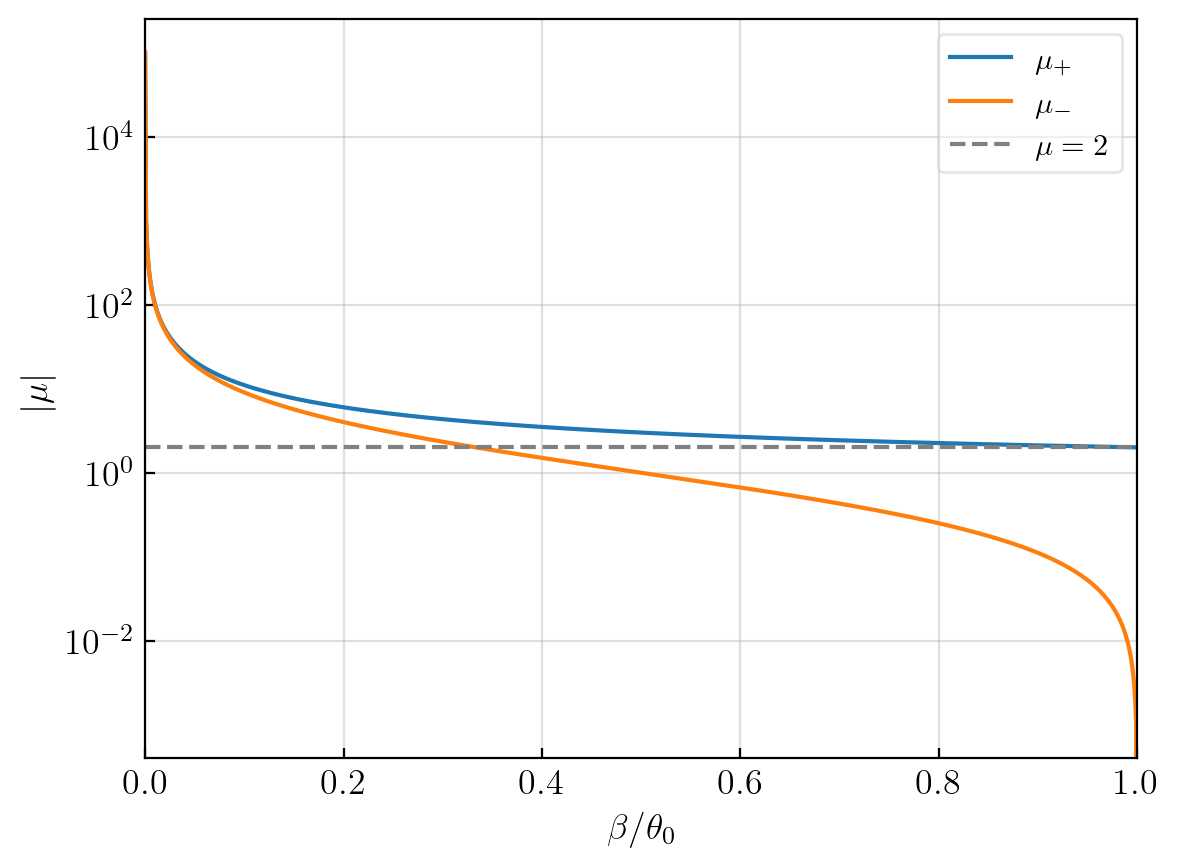

In [2]:
y = np.linspace(1e-5,1,1000) #in units of theta_0


plt.plot(y,sis.mu_plus(y),label=r'$\mu_+$')
plt.semilogy(y,abs(sis.mu_minus(y)),label=r'$\mu_-$')
plt.plot(y,2*np.ones(len(y)),'--',color='gray',label=r'$\mu=2$')
plt.xlabel(r'$\beta/\theta_0$',fontsize=fontsz)
plt.ylabel(r'$|\mu|$',fontsize=fontsz)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
legend = plt.legend(ncol=1,fontsize=fontssz, framealpha=0.5)#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontssz)
plt.grid(alpha=0.4)
plt.xlim([0,1])
plt.show()

We plot the magnification distribution for multiply lensed events, i.e. events within the Einstein radius of the SIS model

In [3]:
y_rand = np.random.uniform(0.01,1,100000)

mu_p_rand = sis.mu_plus(y_rand)
mu_m_rand = sis.mu_minus(y_rand)

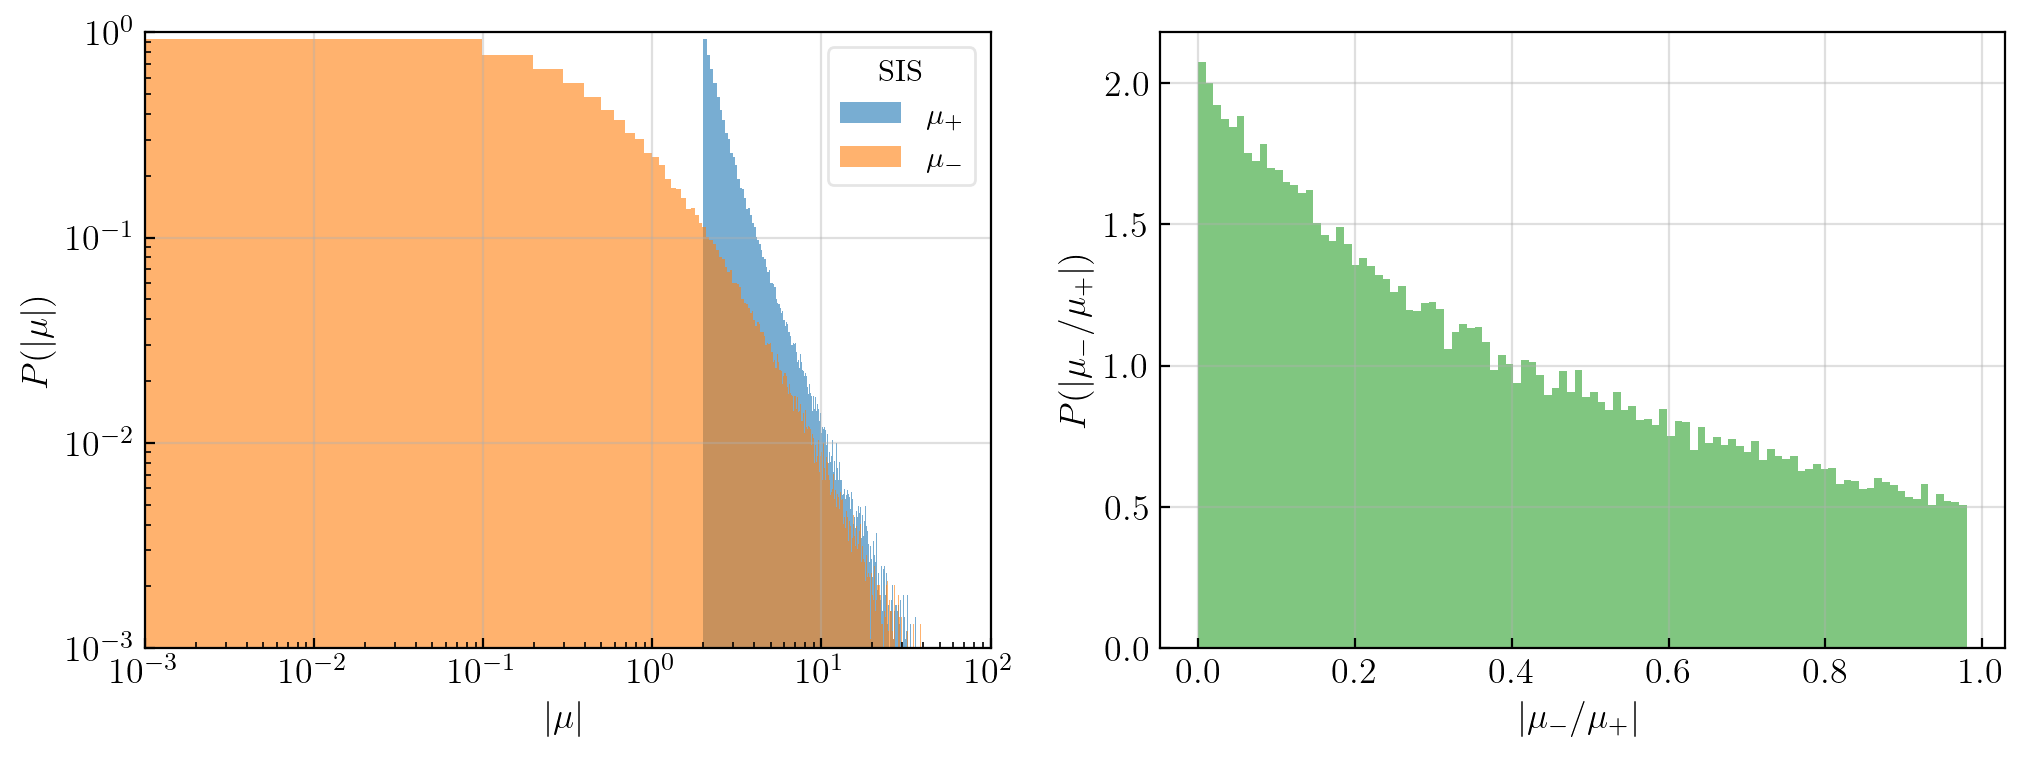

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))#, gridspec_kw={'wspace': .02,'hspace': .05}, sharey=True

ax1.hist(mu_p_rand,density=True,bins=1000,label=r'$\mu_+$',alpha=0.6)
ax1.hist(abs(mu_m_rand),density=True,bins=1000,label=r'$\mu_-$',alpha=0.6)
mus = np.linspace(2,100,100)
ax1.loglog([])
#plt.loglog(mus,8/np.power(mus,3),'gray',lw=2,label=r'$1/\mu^3$')
ax1.set_xlabel(r'$|\mu|$',fontsize=fontsz)
ax1.set_ylabel(r'$P(|\mu|)$',fontsize=fontsz)
ax1.set_ylim([1e-3,1])
ax1.set_xlim([1e-3,1e2])
ax1.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
legend = ax1.legend(ncol=1,fontsize=fontssz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontssz)
ax1.grid(alpha=0.4)

ax2.hist(abs(mu_m_rand)/mu_p_rand,density=True,bins=100,label=r'$\mu_+$',alpha=0.6,color=new_colors[2])
#ax2.loglog([])
#plt.loglog(mus,8/np.power(mus,3),'gray',lw=2,label=r'$1/\mu^3$')
ax2.set_xlabel(r'$|\mu_-/\mu_+|$',fontsize=fontsz)
ax2.set_ylabel(r'$P(|\mu_-/\mu_+|)$',fontsize=fontsz)
#ax2.set_ylim([1e-3,1])
#ax2.set_xlim([1e-3,1e2])
ax2.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
#legend = ax2.legend(ncol=1,fontsize=fontssz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
#plt.setp(legend.get_title(),fontsize=fontssz)
ax2.grid(alpha=0.4)

#plt.savefig(dir_out+'mu_dist_sis.pdf', bbox_inches='tight', transparent=True)
plt.show()

This is to be compared to Fig. 3 in [Fei's paper](https://arxiv.org/pdf/2105.14390.pdf). Note that in the SIS model the brightest image minimum magnification within $\beta<\theta_0$ is 2. However for the SIE model there can be brightest images with $1<\mu<2$. Similarly, in the SIE model the second brightest image could also come from the quads

In [5]:
y_rand = np.random.uniform(0.01,1000,100000)

mu_p_rand = sis.mu_plus(y_rand)
mu_m_rand = sis.mu_minus(y_rand)

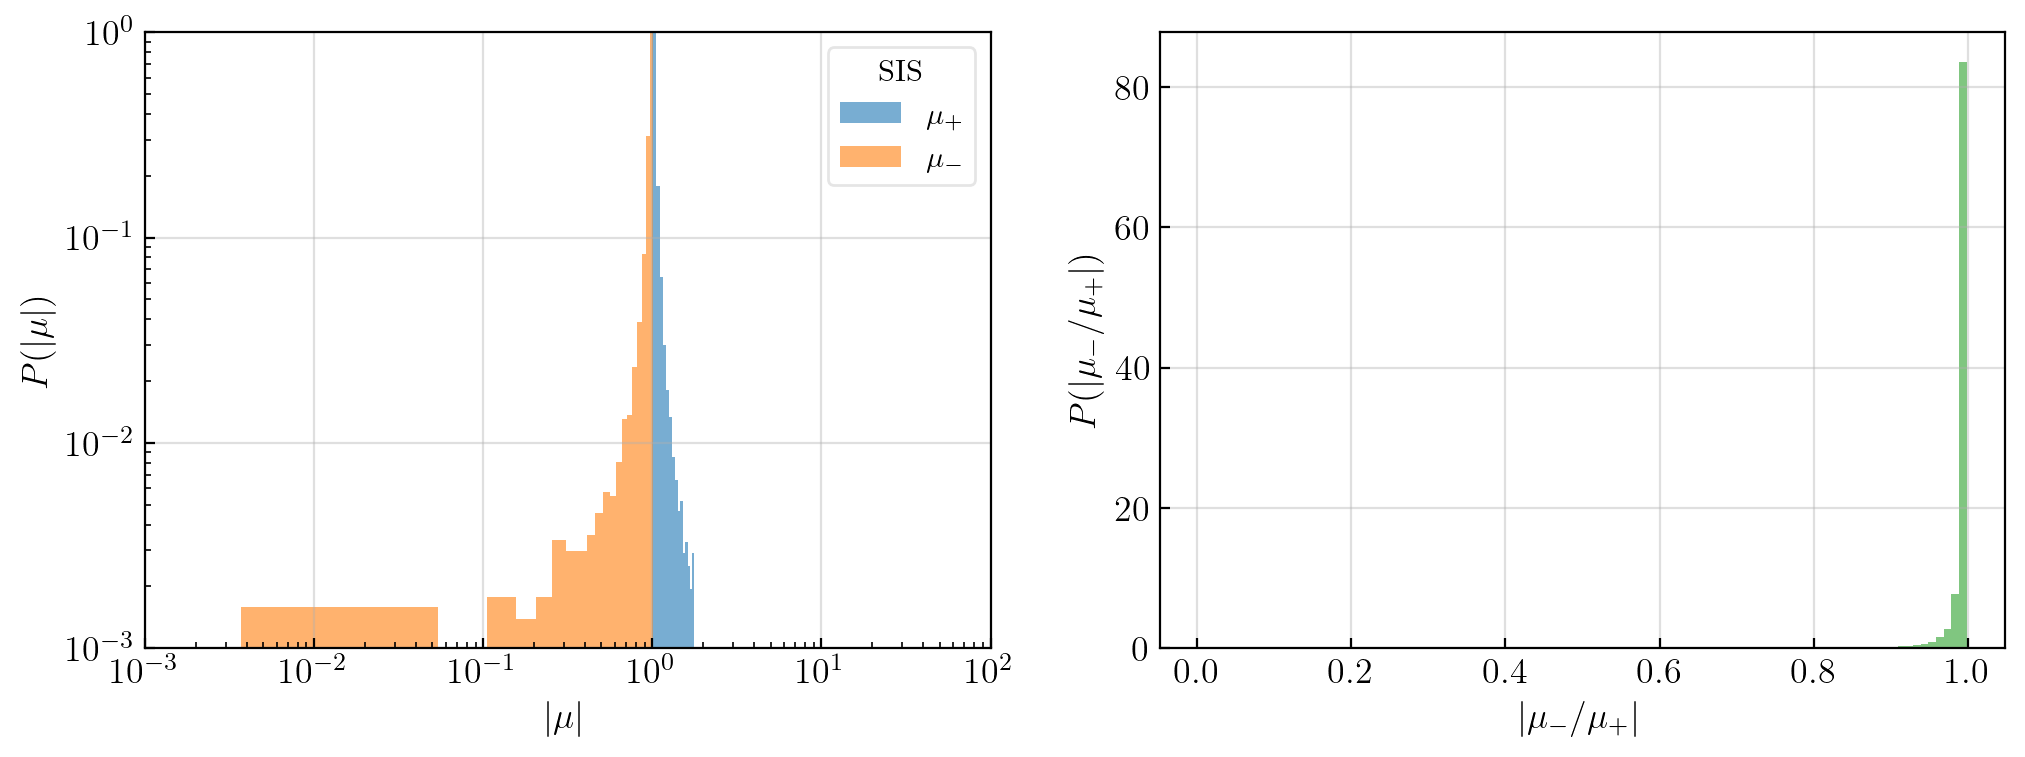

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))#, gridspec_kw={'wspace': .02,'hspace': .05}, sharey=True

ax1.hist(mu_p_rand,density=True,bins=1000,label=r'$\mu_+$',alpha=0.6)
ax1.hist(abs(mu_m_rand),density=True,bins=1000,label=r'$\mu_-$',alpha=0.6)
mus = np.linspace(2,100,100)
ax1.loglog([])
#plt.loglog(mus,8/np.power(mus,3),'gray',lw=2,label=r'$1/\mu^3$')
ax1.set_xlabel(r'$|\mu|$',fontsize=fontsz)
ax1.set_ylabel(r'$P(|\mu|)$',fontsize=fontsz)
ax1.set_ylim([1e-3,1])
ax1.set_xlim([1e-3,1e2])
ax1.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
legend = ax1.legend(ncol=1,fontsize=fontssz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
plt.setp(legend.get_title(),fontsize=fontssz)
ax1.grid(alpha=0.4)

ax2.hist(abs(mu_m_rand)/mu_p_rand,density=True,bins=100,label=r'$\mu_+$',alpha=0.6,color=new_colors[2])
#ax2.loglog([])
#plt.loglog(mus,8/np.power(mus,3),'gray',lw=2,label=r'$1/\mu^3$')
ax2.set_xlabel(r'$|\mu_-/\mu_+|$',fontsize=fontsz)
ax2.set_ylabel(r'$P(|\mu_-/\mu_+|)$',fontsize=fontsz)
#ax2.set_ylim([1e-3,1])
#ax2.set_xlim([1e-3,1e2])
ax2.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
#legend = ax2.legend(ncol=1,fontsize=fontssz, framealpha=0.5,title='SIS')#,bbox_to_anchor=(0.5,1.02)
#plt.setp(legend.get_title(),fontsize=fontssz)
ax2.grid(alpha=0.4)

#plt.savefig(dir_out+'mu_dist_sis.pdf', bbox_inches='tight', transparent=True)
plt.show()